In [1]:
# Lets import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lets load the Dataset
df = pd.read_csv('student_info.csv')

In [3]:
# Lets checkout the Dataset
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
# lets check the shape of a Dataset
df.shape

(200, 2)

In [5]:
# Discover and visualize the data to find insight
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


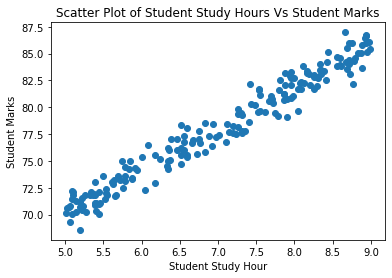

In [8]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("Student Study Hour")
plt.ylabel("Student Marks")
plt.title("Scatter Plot of Student Study Hours Vs Student Marks")
plt.show()

In [9]:
# Preparing the data for Machine Learning Algorithm
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
# Finding mean of columns
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [11]:
# Lets fill the mean value in empty cell
new_df = df.fillna(df.mean())
# check new dataframe contain empty cell or not
new_df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [12]:
# Lets see the new DataFrame
new_df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [28]:
x = new_df.drop("student_marks",axis=1)
y = new_df.drop("study_hours",axis=1)
print("Shape of x = ",x.shape)
print("Shape of y = ",y.shape)

Shape of x =  (200, 1)
Shape of y =  (200, 1)


In [29]:
# Lets split the Dataset into train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=51)
print("Shape of x_train = ",x_train.shape)
print("Shape of y_train = ",y_train.shape)
print("Shape of x_test = ",x_test.shape)
print("Shape of y_test = ",y_test.shape)

Shape of x_train =  (160, 1)
Shape of y_train =  (160, 1)
Shape of x_test =  (40, 1)
Shape of y_test =  (40, 1)


In [30]:
# According to above scatter diagram, data are in linear fashion
# So we can use Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Lets train the model
model = lr.fit(x_train,y_train)

# Let's Predict

In [34]:
# Let's predict by giving some input to the model
model.predict(np.array([[6]])).round(2)

array([[74.06]])

In [37]:
# Lets predict by using the test dataset
y_pred = model.predict(x_test)
# Creating DataFrame to see the output Properly
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['study_hours','Original student Marks','Predicted Student Marks'])


,study_hours,Original student Marks,Predicted Student Marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [38]:
# Lets check the accuracy 
model.score(x_test,y_test)

0.9514124242154464

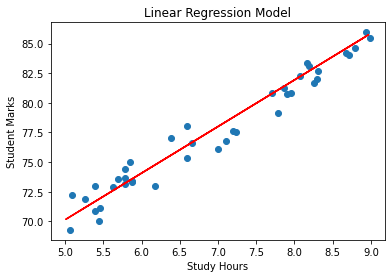

In [40]:
# Lets plot the Linear line in scatter plot
plt.scatter(x_test,y_test)
plt.plot(x_train,model.predict(x_train),color = "r")
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.title("Linear Regression Model")
plt.show()